# Dog Breed Classification using Transfer Learning


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial

import warnings
warnings.filterwarnings('ignore')
AUTO = tf.data.experimental.AUTOTUNE

In [ ]:
# Instalează gdown
!pip install --quiet gdown

import gdown
file_id = "14of-v7y9Q95fqBvOXfTrEg2C2LZ-aq6l"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "dog_dataset.zip", quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=14of-v7y9Q95fqBvOXfTrEg2C2LZ-aq6l
From (redirected): https://drive.google.com/uc?id=14of-v7y9Q95fqBvOXfTrEg2C2LZ-aq6l&confirm=t&uuid=506d5ba3-2c77-4910-a9cb-f6ce0bada92b
To: /content/dog_dataset.zip
100%|██████████| 724M/724M [00:13<00:00, 53.7MB/s]


'dog_dataset.zip'

In [ ]:
!ls -lh dog_dataset.zip


-rw-r--r-- 1 root root 691M Dec 11  2024 dog_dataset.zip


In [ ]:
from zipfile import ZipFile
with ZipFile("dog_dataset.zip", "r") as zipf:
    zipf.extractall("/content/dog_data")
    print("Dataset-ul a fost extras în /content/dog_data")


Dataset-ul a fost extras în /content/dog_data


In [ ]:
from zipfile import ZipFile
data_path = 'dog_dataset.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [ ]:
df = pd.read_csv('labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
print("Total imagini:", len(df))
print("Total rase unice:", df['breed'].nunique())


Total imagini: 10222
Total rase unice: 120


<Axes: xlabel='breed'>

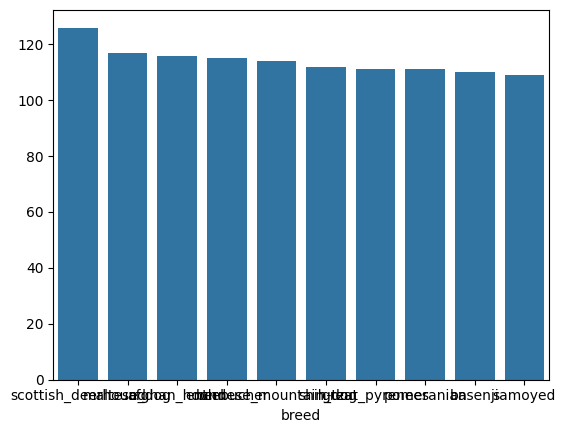

In [ ]:
top_10 = df['breed'].value_counts().head(10)
sb.barplot(x=top_10.index, y=top_10.values)


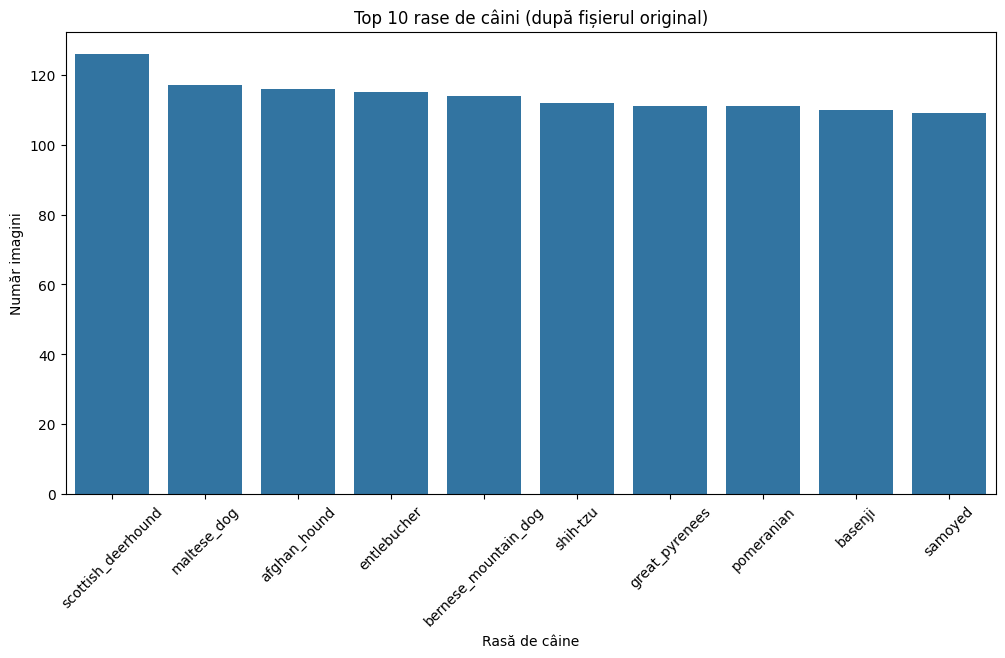

In [ ]:

df_orig = pd.read_csv('labels.csv')  # conține breed-ul ca text

# calculăm top 10 rase direct pe valori text
top_10 = df_orig['breed'].value_counts().head(10)

plt.figure(figsize=(12,6))
sb.barplot(x=top_10.index, y=top_10.values)
plt.xticks(rotation=45)
plt.xlabel("Rasă de câine")
plt.ylabel("Număr imagini")
plt.title("Top 10 rase de câini (după fișierul original)")
plt.show()


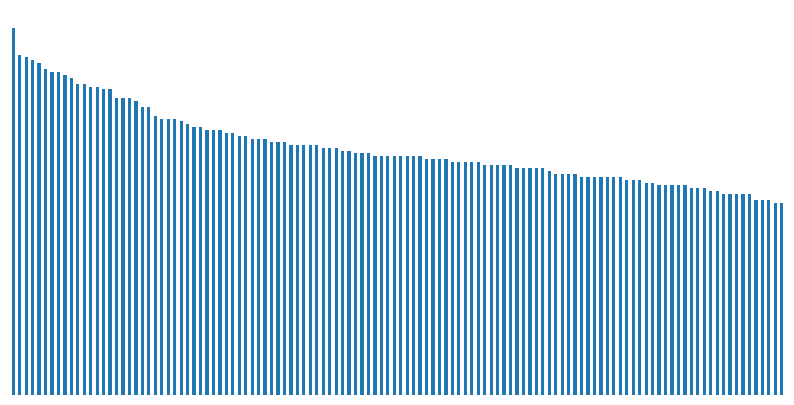

In [ ]:
plt.figure(figsize=(10, 5))
df['breed'].value_counts().plot.bar()
plt.axis('off')
plt.show()

In [ ]:
df['filepath'] = 'train/' + df['id'] + '.jpg'
df.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,train/0021f9ceb3235effd7fcde7f7538ed62.jpg


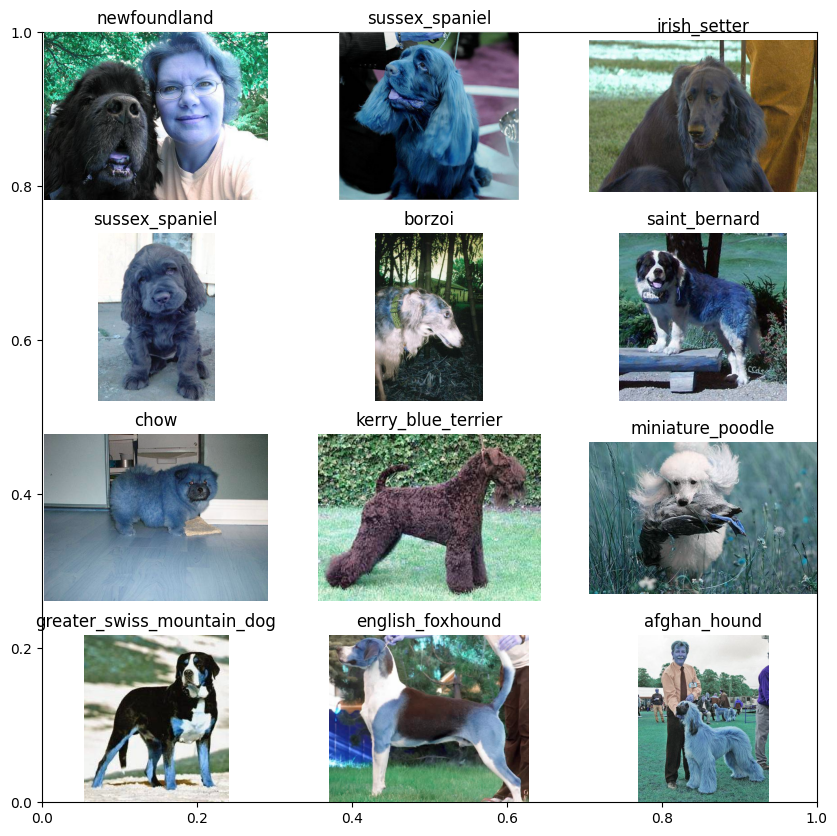

In [ ]:
plt.subplots(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 3, i+1)

    # Selecting a random image
    # index from the dataframe.
    k = np.random.randint(0, len(df))
    img = cv2.imread(df.loc[k, 'filepath'])
    plt.imshow(img)
    plt.title(df.loc[k, 'breed'])
    plt.axis('off')
plt.show()

In [ ]:
le = LabelEncoder()
df['breed'] = le.fit_transform(df['breed'])
df.head()

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,19,train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,37,train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,85,train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,15,train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,49,train/0021f9ceb3235effd7fcde7f7538ed62.jpg


In [ ]:
features = df['filepath']
target = df['breed']

X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.15,
                                      random_state=10)

X_train.shape, X_val.shape

((8688,), (1534,))

In [ ]:
import albumentations as A

transforms_train = A.Compose([
    A.VerticalFlip(p=0.2),
    A.HorizontalFlip(p=0.7),
    A.CoarseDropout(p=0.5),
    A.RandomGamma(p=0.5),
    A.RandomBrightnessContrast(p=1)
])

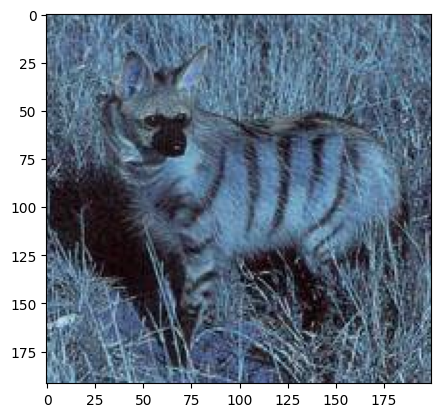

In [ ]:
img = cv2.imread('train/00792e341f3c6eb33663e415d0715370.jpg')
plt.imshow(img)
plt.show()

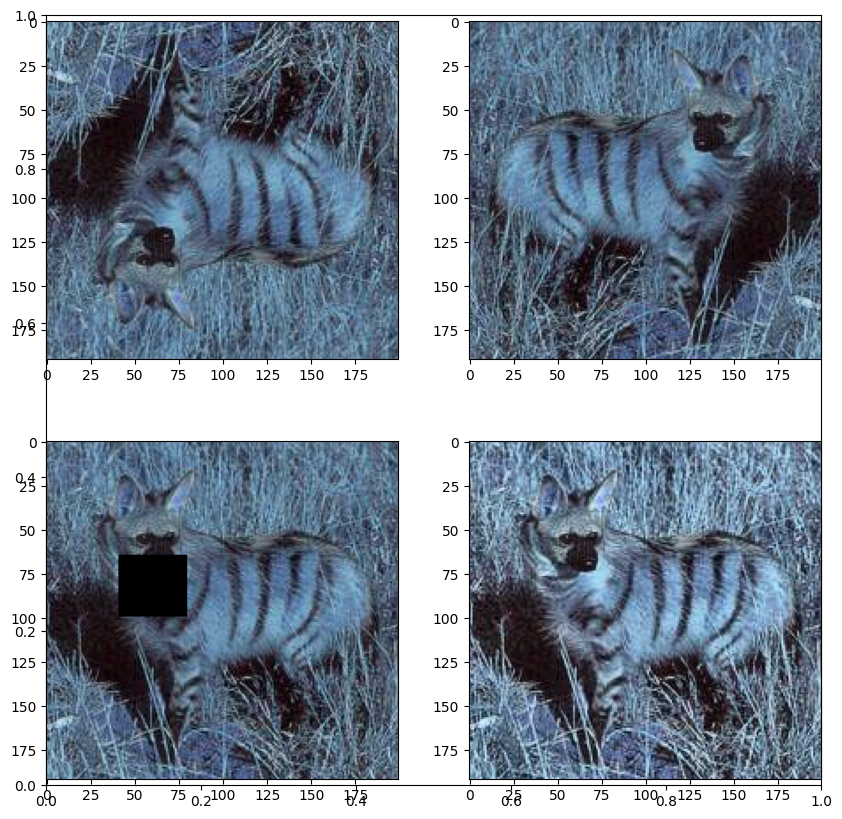

In [ ]:
augments = [A.VerticalFlip(p=1), A.HorizontalFlip(p=1),
            A.CoarseDropout(p=1), A.CLAHE(p=1)]

plt.subplots(figsize=(10, 10))
for i, aug in enumerate(augments):
    plt.subplot(2, 2, i+1)
    aug_img = aug(image=img)['image']
    plt.imshow(aug_img)
plt.show()

In [ ]:
def aug_fn(img):
    aug_data = transforms_train(image=img)
    aug_img = aug_data['image']

    return aug_img


@tf.function
def process_data(img, label):
    aug_img = tf.numpy_function(aug_fn,
                                [img],
                                Tout=tf.float32)

    return img, label


def decode_image(filepath, label=None):

    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [128, 128])
    img = tf.cast(img, tf.float32) / 255.0

    if label == None:
        return img

    return img, tf.one_hot(indices=label,
                           depth=120,
                           dtype=tf.float32)

In [ ]:
train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .map(decode_image, num_parallel_calls=AUTO)
    .map(partial(process_data), num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)

val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)

In [ ]:
for img, label in train_ds.take(1):
  print(img.shape, label.shape)

(32, 128, 128, 3) (32, 120)


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(
    input_shape=(128, 128, 3),
    weights='imagenet',
    include_top=False
)

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
# Access the output shape from the output tensor of the layer
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output


last layer output shape:  (None, 6, 6, 768)


In [ ]:
# Model Architecture
x = layers.Flatten()(last_output)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
output = layers.Dense(120, activation='softmax')(x)

model = keras.Model(pre_trained_model.input, output)

# Model Compilation
model.compile(
	optimizer='adam',
	loss=keras.losses.CategoricalCrossentropy(from_logits=True),
	metrics=[tf.keras.metrics.AUC()]
)



In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if logs.get('val_auc') is not None and logs.get('val_auc') > 0.99:
			print('\n Validation accuracy has reached upto 90% so, stopping further training.')
			self.model.stop_training = True

es = EarlyStopping(patience=10,
                monitor='val_auc',
                restore_best_weights=True,
                mode='max')

lr = ReduceLROnPlateau(monitor='val_loss',
					patience=2,
					factor=0.5,
					verbose=1)



In [ ]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=15,
                    verbose=1,
                    callbacks=[es, lr, myCallback()])

Epoch 1/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 50s 139ms/step - auc_1: 0.7157 - loss: 4.3646 - val_auc_1: 0.9363 - val_loss: 2.5700 - learning_rate: 0.0010
Epoch 2/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - auc_1: 0.9621 - loss: 2.2334 - val_auc_1: 0.9356 - val_loss: 2.4184 - learning_rate: 0.0010
Epoch 3/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - auc_1: 0.9915 - loss: 1.1965 - val_auc_1: 0.9234 - val_loss: 2.4824 - learning_rate: 0.0010
Epoch 4/15
271/272 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - auc_1: 0.9989 - loss: 0.5200
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
272/272 ━━━━━━━━━━━━━━━━━━━━ 39s 79ms/step - auc_1: 0.9989 - loss: 0.5193 - val_auc_1: 0.9150 - val_loss: 2.5257 - learning_rate: 0.0010
Epoch 5/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - auc_1: 1.0000 - loss: 0.1840 - val_auc_1: 0.9275 - val_loss: 2.2995 - learning_rate: 5.0000e-04
Epoch 6/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - auc_1: 1.0000 - loss: 0.0769 - val_auc_1: 0.9291 -

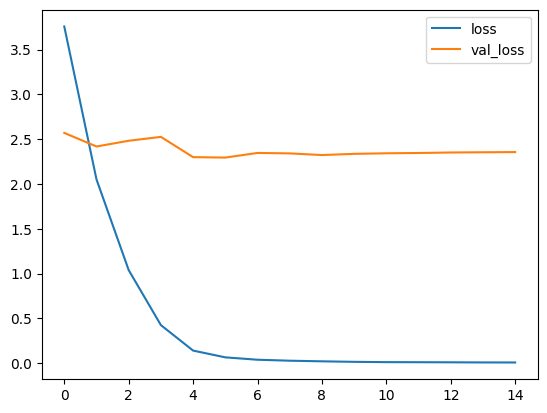

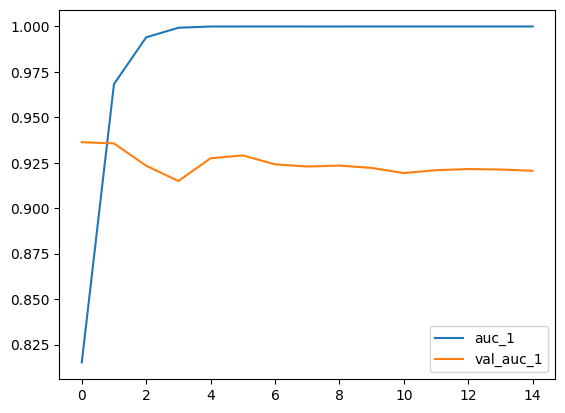

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['auc_1', 'val_auc_1']].plot()
plt.show()

In [ ]:
# --- 1. Salvează modelul și LabelEncoder-ul ---
model.save('/content/dog_breed_classifier_colab.h5')
with open('/content/label_encoder_colab.pkl', 'wb') as f:
    pickle.dump(le, f)

print("Model salvat ca /content/dog_breed_classifier_colab.h5")
print("Encoder salvat ca /content/label_encoder_colab.pkl")


Model salvat ca /content/dog_breed_classifier_colab.h5
Encoder salvat ca /content/label_encoder_colab.pkl


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle

# --- 3. Încarcă model și encoder salvate ---
model = load_model('/content/dog_breed_classifier_colab.h5')

with open('/content/label_encoder_colab.pkl', 'rb') as f:
    le_loaded = pickle.load(f)

class_names = list(le_loaded.classes_)   # 120 de rase
print("Model și encoder încărcate. Număr rase:", len(class_names))


Model și encoder încărcate. Număr rase: 120


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def predict_image(image_path, threshold=40):
    """
    Predict pe o singură imagine. Dacă încrederea < threshold (%), afișează mesaj 'non-câine'.
    """
    # 1. Citește și pregătește imaginea
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print(f"Nu pot citi imaginea: {image_path}")
        return
    img_resized = cv2.resize(img_bgr, (128, 128))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # 2. Normalizează și adaugă batch dimension
    img_array = np.expand_dims(img_rgb / 255.0, axis=0)  # (1,128,128,3)

    # 3. Predictie
    preds = model.predict(img_array)[0]  # vector de 120 probabilități
    pred_index = int(np.argmax(preds))
    confidence = float(np.max(preds) * 100)  # în procente
    pred_breed = class_names[pred_index]

    # 4. Afișare imagine + titlu
    plt.figure(figsize=(4,4))
    plt.imshow(img_rgb)
    plt.axis('off')

    if confidence < threshold:
        title = f"NU pare a fi un câine ({confidence:.1f}%)"
        print(f"Încredere prea mică ({confidence:.1f}%) – posib. non-câine.")
    else:
        title = f"{pred_breed} ({confidence:.1f}%)"
        print(f"Predicție: {pred_breed} cu {confidence:.1f}%")

    plt.title(title)
    plt.show()



––– Predicție pentru: dog1.jpg –––
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Predicție: samoyed cu 99.7%


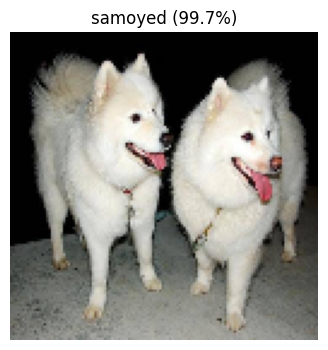


––– Predicție pentru: dog2.jpg –––
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicție: eskimo_dog cu 70.9%


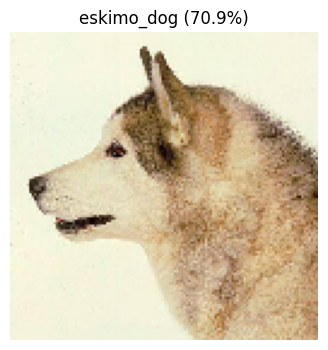


––– Predicție pentru: dog3.jpg –––
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicție: great_pyrenees cu 74.3%


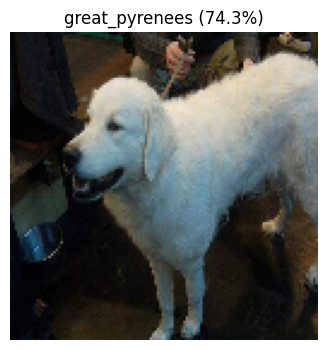

In [ ]:
import os

file_names = ['dog1.jpg', 'dog2.jpg', 'dog3.jpg']

test_folder = '/content/test_images'

for fname in file_names:
    image_path = os.path.join(test_folder, fname)

    if not os.path.exists(image_path):
        print(f"Fișierul nu a fost găsit: {image_path}")
        continue

    print(f"\n––– Predicție pentru: {fname} –––")
    predict_image(image_path, threshold=40)
